# Deep Neural Networks (Tensorflow)
## Chapter 5
### Predictive Analytics for the Modern Enterprise

The notebook has been tested using the following pre-requisite:

* Python V3.9.13 - https://www.python.org/
* Tensorflow V2.11.0 
* Keras V2.11.0
* Jupyter - V6.4.12 - https://jupyter.org/
* Desktop computer - macOS Ventura V13.1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tflow
from tensorflow import keras
from tensorflow.keras import layers

from pandas import options, read_csv

2023-02-27 14:52:20.875490: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


This data is sourced from https://archive.ics.uci.edu/ml/datasets/abalone

In [2]:
local_ds = '../Datasets/Abalone/Dataset.data' #Change this to where you downloaded the data. 
abalone = read_csv(local_ds, delim_whitespace=True)
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
k_dataset = abalone.copy() #Make a copy of the daya
k_dataset = pd.get_dummies(k_dataset) # Do one-hot encoding of categorical fields
k_dataset 

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [4]:
k_dataset.isna().sum() #null values have been removed

length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
sex_F             0
sex_I             0
sex_M             0
dtype: int64

In [5]:
k_training_ds = k_dataset.sample(frac=0.8, random_state=0) #Create training dataset as 80% of whole dataset
k_testing_ds = k_dataset.drop(k_training_ds.index) #Create test dataset by dropping training dataset indexes from whole dataset
k_training_ds

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
668,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350,13,0,0,1
1580,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935,8,0,1,0
3784,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175,11,0,0,1
463,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200,5,0,1,0
2615,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775,12,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1659,0.600,0.480,0.180,1.0645,0.4495,0.2455,0.3250,10,1,0,0
3306,0.410,0.300,0.115,0.2595,0.0970,0.0515,0.0800,10,0,1,0
920,0.415,0.330,0.090,0.3595,0.1700,0.0810,0.0900,6,0,1,0
1433,0.370,0.270,0.095,0.2320,0.1325,0.0410,0.0615,6,0,1,0


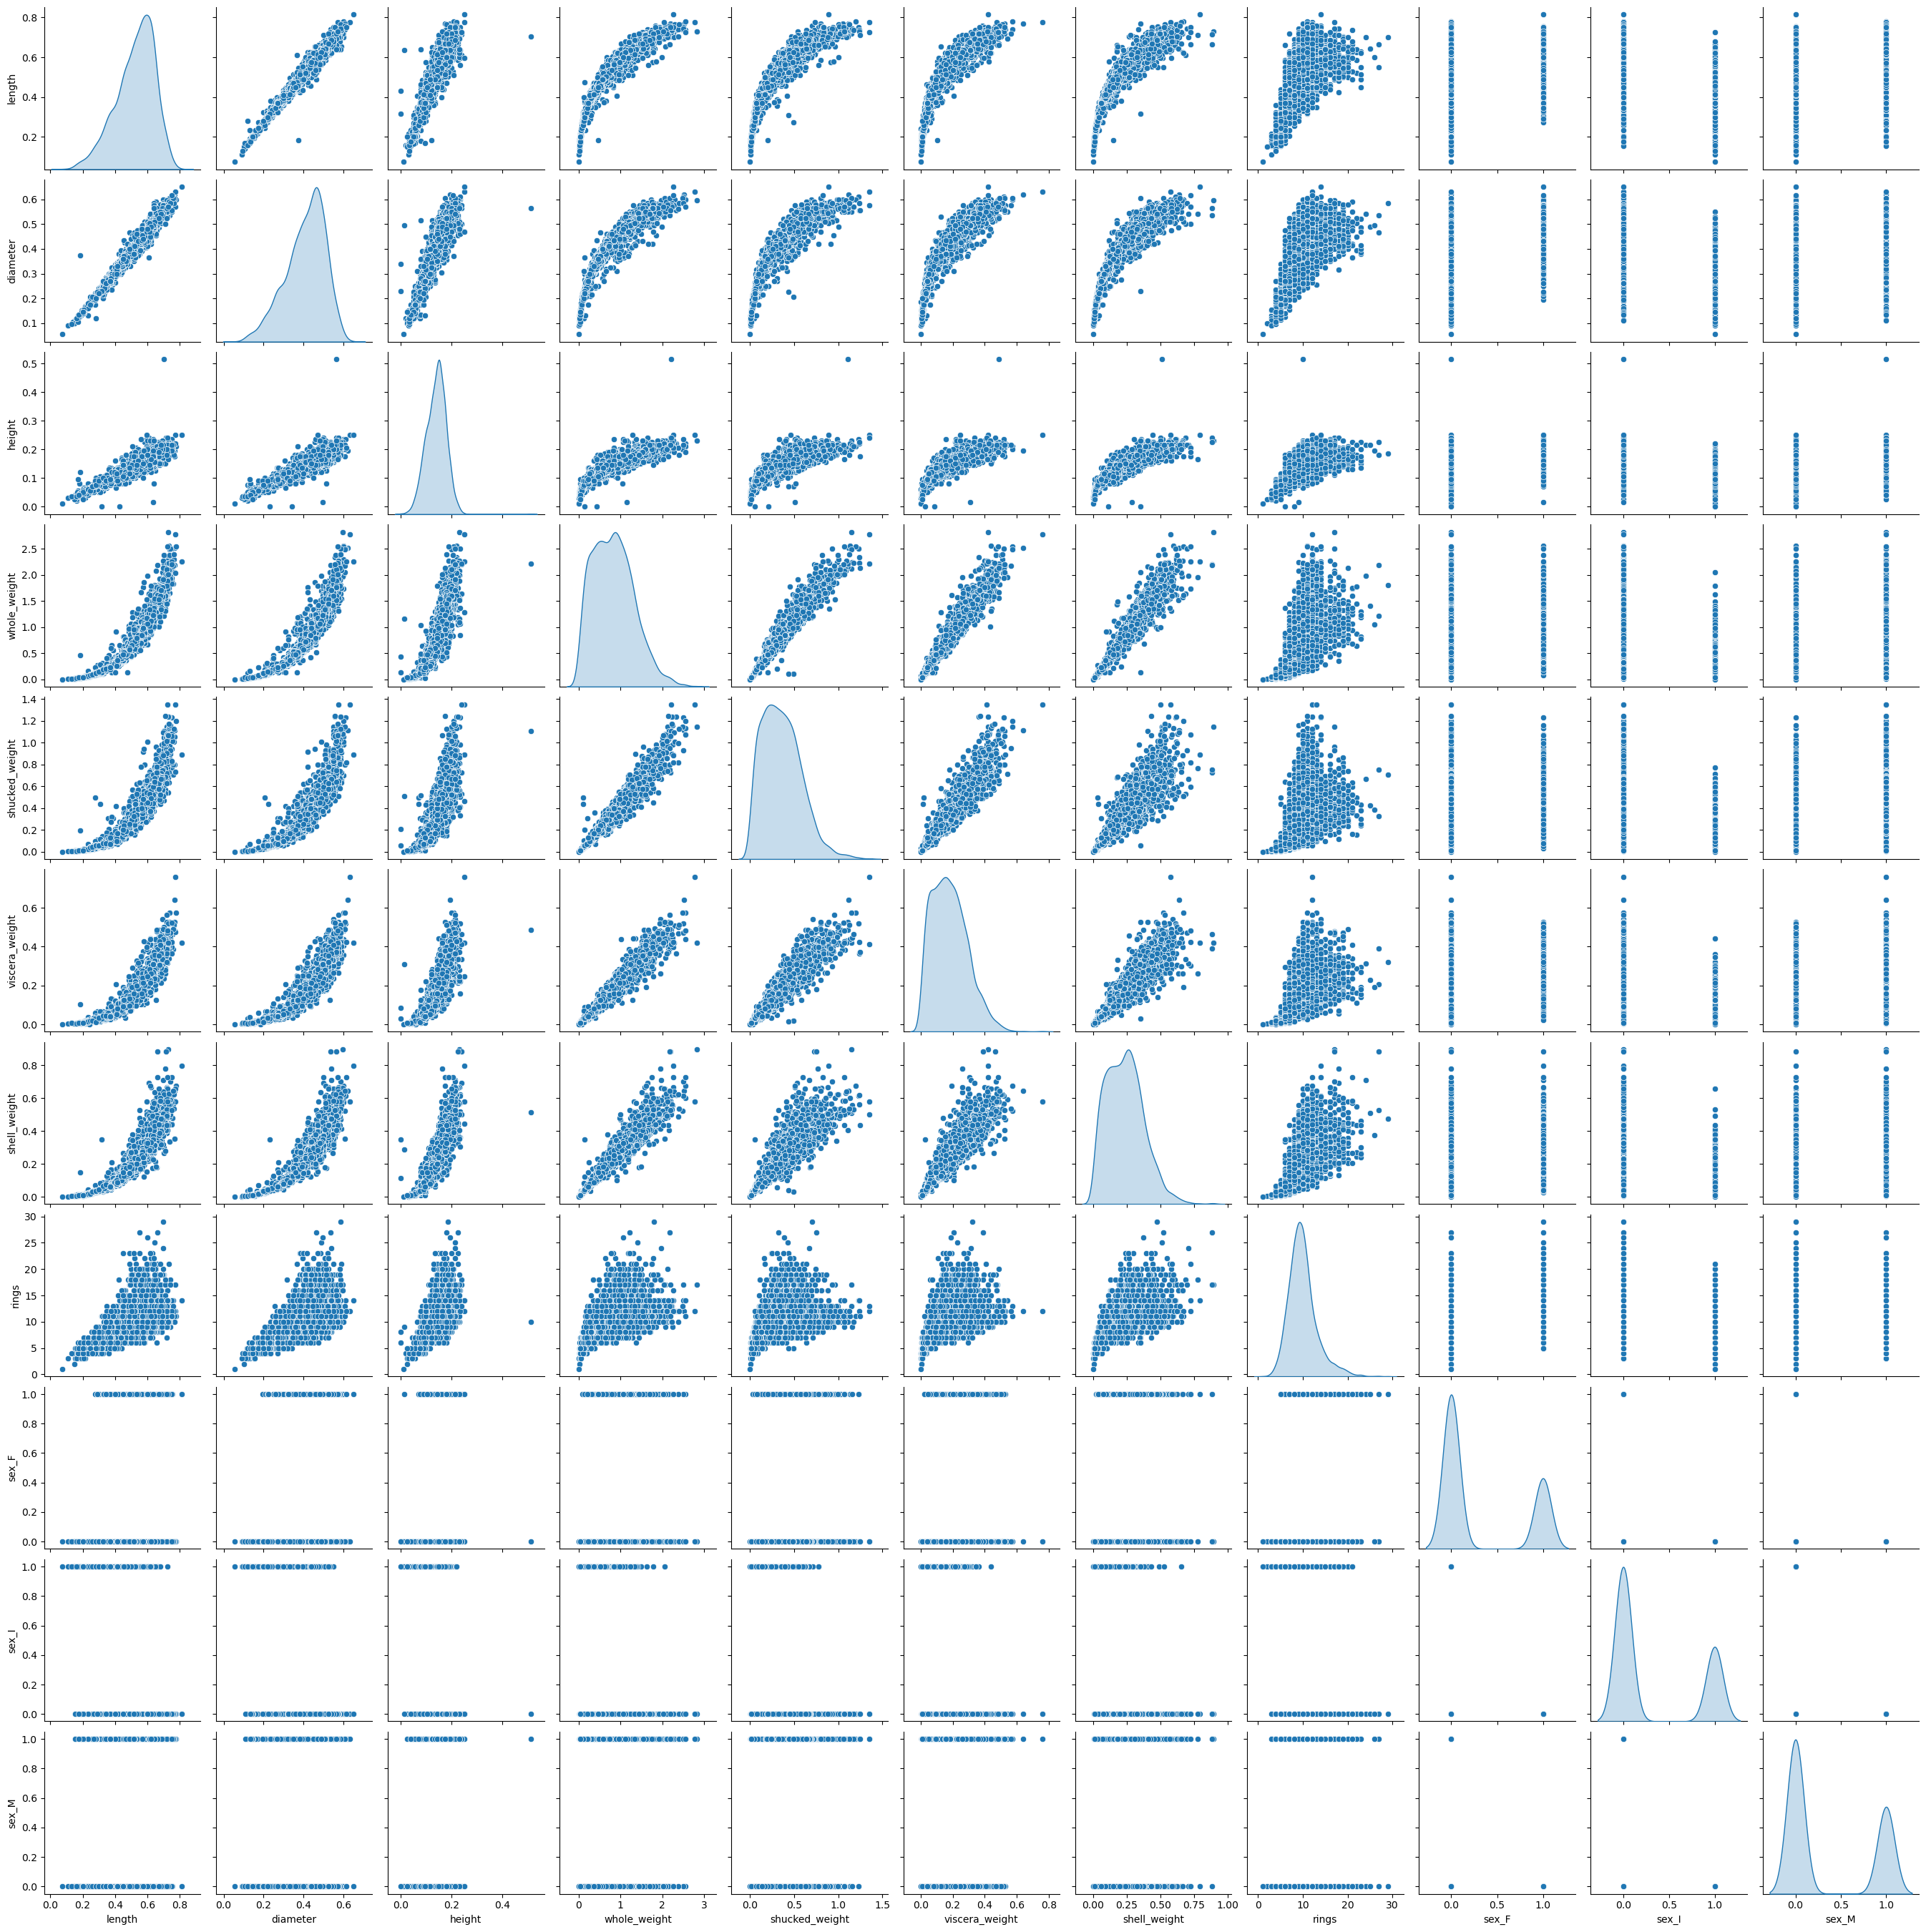

In [6]:
%matplotlib inline
sns.pairplot(k_training_ds, diag_kind='kde')

In [7]:
k_training_ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,3342.0,0.524065,0.119299,0.0750,0.450000,0.54500,0.615000,0.8150
diameter,3342.0,0.407723,0.098505,0.0550,0.350000,0.42500,0.480000,0.6500
height,3342.0,0.139455,0.038818,0.0000,0.115000,0.14000,0.165000,0.5150
whole_weight,3342.0,0.827379,0.488588,0.0020,0.440125,0.79975,1.145000,2.8255
shucked_weight,3342.0,0.358846,0.221154,0.0010,0.185625,0.33600,0.499500,1.3510
viscera_weight,3342.0,0.180795,0.109585,0.0005,0.093500,0.17050,0.253000,0.7600
shell_weight,3342.0,0.238099,0.137449,0.0015,0.130000,0.23375,0.326375,0.8970
rings,3342.0,9.916517,3.180008,1.0000,8.000000,10.00000,11.000000,29.0000
sex_F,3342.0,0.313884,0.464139,0.0000,0.000000,0.00000,1.000000,1.0000
sex_I,3342.0,0.325554,0.468651,0.0000,0.000000,0.00000,1.000000,1.0000


In [8]:
k_training_ds = k_training_ds.copy() #Copy of the data
k_testing_ds = k_testing_ds.copy() #Copy of the data 

k_train_predict = k_training_ds.pop('rings') #Data for rings ONLY (to be predicted) <- Removed from features
k_test_predict = k_testing_ds.pop('rings') #Data for rings ONLY(to be predicted) <- Removed from features


In [9]:
k_training_ds.describe().transpose()[['mean', 'std']]

,mean,std
length,0.524065,0.119299
diameter,0.407723,0.098505
height,0.139455,0.038818
whole_weight,0.827379,0.488588
shucked_weight,0.358846,0.221154
viscera_weight,0.180795,0.109585
shell_weight,0.238099,0.137449
sex_F,0.313884,0.464139
sex_I,0.325554,0.468651
sex_M,0.360563,0.480236


In [10]:
normalizer = tflow.keras.layers.Normalization(axis=1) #A preprocessing layer which normalizes continuous features 

In [11]:
normalizer.adapt(np.array(k_training_ds))

2023-02-27 14:52:40.349934: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Computes the mean and variance of values in a dataset.

In [12]:
print(normalizer.mean.numpy())

[[0.5240649  0.40772295 0.13945538 0.82737887 0.35884637 0.18079533
  0.2380991  0.313884   0.3255536  0.36056268]]


input_shape=[1,] = we are passing only 1 features so input tensor has a shape 1,

units = 1 - Positive integer, dimensionality of the output space.

In [25]:
dnn_model = tflow.keras.Sequential() #Define the model
dnn_model.add(normalizer) #Add a pre-processing layer
dnn_model.add(layers.Dense(64, activation='relu')) #non linear layer 1
dnn_model.add(layers.Dense(64, activation='relu')) #non linear layer 2
dnn_model.add(layers.Dense(1)) #Apply linear transformation via a dense layer that produces 1 output

In [26]:
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,950
Trainable params: 4,929
Non-trainable params: 21
_________________________________________________________________


In [15]:
dnn_model.compile(   #compile the model to define the optimizer and the loss 
    optimizer=tflow.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [16]:
%load_ext tensorboard

In [17]:
import tensorflow as tf
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

dnn_model.fit(   
    k_training_ds,
    k_train_predict,
    epochs=100,
    verbose=1, 
    validation_split = 0.2,
    callbacks=[tensorboard_callback])  # Calculate validation results on 20% of the training data.

Epoch 1/100
84/84 [==============================] - 1s 4ms/step - loss: 5.8210 - val_loss: 3.0684
Epoch 2/100
84/84 [==============================] - 0s 2ms/step - loss: 2.0823 - val_loss: 1.6675
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 1.6139 - val_loss: 1.6022
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 1.5742 - val_loss: 1.5731
Epoch 5/100
84/84 [==============================] - 0s 2ms/step - loss: 1.5456 - val_loss: 1.5891
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 1.5426 - val_loss: 1.5600
Epoch 7/100
84/84 [==============================] - 0s 2ms/step - loss: 1.5070 - val_loss: 1.5501
Epoch 8/100
84/84 [==============================] - 0s 2ms/step - loss: 1.5063 - val_loss: 1.5350
Epoch 9/100
84/84 [==============================] - 0s 2ms/step - loss: 1.4983 - val_loss: 1.5309
Epoch 10/100
84/84 [==============================] - 0s 2ms/step - loss: 1.4879 - val_loss: 1.5574
Epoch 11/

84/84 [==============================] - 0s 2ms/step - loss: 1.3869 - val_loss: 1.5073
Epoch 84/100
84/84 [==============================] - 0s 2ms/step - loss: 1.3779 - val_loss: 1.4898
Epoch 85/100
84/84 [==============================] - 0s 2ms/step - loss: 1.3813 - val_loss: 1.4764
Epoch 86/100
84/84 [==============================] - 0s 2ms/step - loss: 1.3716 - val_loss: 1.5129
Epoch 87/100
84/84 [==============================] - 0s 2ms/step - loss: 1.3767 - val_loss: 1.5346
Epoch 88/100
84/84 [==============================] - 0s 2ms/step - loss: 1.3774 - val_loss: 1.4870
Epoch 89/100
84/84 [==============================] - 0s 2ms/step - loss: 1.3669 - val_loss: 1.4785
Epoch 90/100
84/84 [==============================] - 0s 2ms/step - loss: 1.3653 - val_loss: 1.5133
Epoch 91/100
84/84 [==============================] - 0s 2ms/step - loss: 1.3758 - val_loss: 1.4853
Epoch 92/100
84/84 [==============================] - 0s 2ms/step - loss: 1.3737 - val_loss: 1.4782
Epoch 93/100


In [18]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 56644), started 2 days, 19:25:14 ago. (Use '!kill 56644' to kill it.)

In [19]:
evaluation =  dnn_model.evaluate(k_testing_ds, k_test_predict, verbose=1)
print(evaluation)

27/27 [==============================] - 0s 1ms/step - loss: 1.5485
1.548452377319336


In [ ]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate( #Final loss test data
    k_dataset_test['length'], k_test_labels, verbose=0)
test_results['linear_model'] 

In [21]:
predictions = dnn_model.predict(k_testing_ds[5:8])
print(predictions)

1/1 [==============================] - 0s 95ms/step
[[ 9.567473]
 [11.055283]
 [11.383731]]


In [22]:
print(k_test_predict[5:8])

24    10
25    11
26    11
Name: rings, dtype: int64
